In [25]:
p2fld_648 = pl.Path(r'/Users/htelg/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#8/netcdf/v0.2')

ds648 = xr.open_mfdataset(p2fld_648.glob('*.nc'))

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_25244/1325050931.py:3: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds648 = xr.open_mfdataset(p2fld_648.glob('*.nc'))


In [26]:
p2fld_649 = pl.Path(r'/Users/htelg/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#9/netcdf/v0.2')

ds649 = xr.open_mfdataset(p2fld_649.glob('*.nc'))

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_25244/1207215762.py:3: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds649 = xr.open_mfdataset(p2fld_649.glob('*.nc'))


In [ ]:
p2fld_met = pl.Path(r'/Users/htelg/nfs/grad/campaign/frc/2025/MetaData.netcdf/')

dsmet = xr.open_mfdataset(p2fld_met.glob('*.nc'))

In [41]:
am = 1/np.cos(np.deg2rad(ds648.solar_zenith_angle))

In [59]:
pwvaeo = dsmet.precipitable_water_aeronet
pwvaeo = pwvaeo.where(pwvaeo > 0)
pwvaeo /= 10

In [58]:
pwvms = dsmet.precipitable_water_meteoswiss
pwvms = pwvms.where(pwvms > 0)
pwvms /= 10

In [55]:
%matplotlib widget

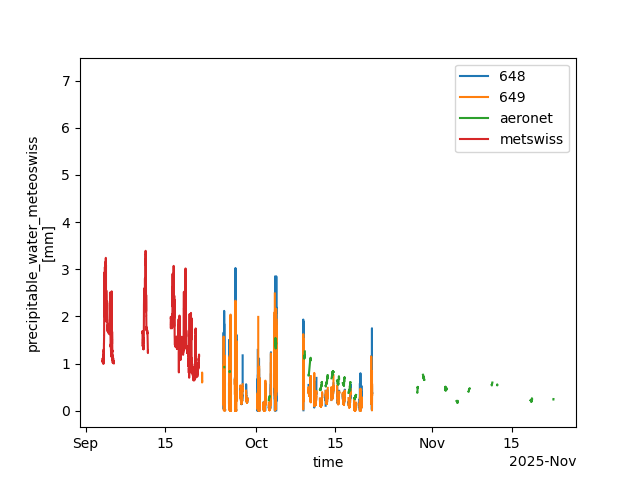

In [61]:
f,a = plt.subplots()

ds648.precipitable_water.plot(ax = a, label = '648')
# (ds648.precipitable_water/am).plot(ax = a, label = '648 am')

ds649.precipitable_water.plot(ax = a, label = '649')

pwvaeo.plot(ax = a, label = 'aeronet')
pwvms.plot(ax = a, label = 'metswiss')
a.legend()
f.show()

In [15]:
dsmet.precipitable_water_meteoswiss.plot(ax = a, label = 'aeronet')

In [36]:
ds648.solar_zenith_angle.compute()

<xarray.DataArray 'solar_zenith_angle' (datetime: 99421)> Size: 795kB
array([132.90368615, 132.8877622 , 132.87173298, ...,  57.96958505,
        57.96194512,  57.95439869], shape=(99421,))
Coordinates:
  * datetime  (datetime) datetime64[ns] 795kB 2025-09-25 ... 2025-10-21T10:38...
    quantile  float64 8B 0.9

In [62]:
dsmet.precipitable_water_aeronet/10

<xarray.Dataset> Size: 11MB
Dimensions:                        (time: 95040)
Coordinates:
  * time                           (time) datetime64[ns] 760kB 2025-09-04 ......
Data variables: (12/14)
    year                           (time) int64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    month                          (time) int64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    day                            (time) int64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    hour                           (time) int64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    minute                         (time) int64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ozone                          (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                             ...
    relative_humidity              (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    wind_speed                     (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    wind_direction                 (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    precipitable_water_meteoswiss  (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    gps_flag                       (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
    precipitable_water_aeronet     (time) float64 760kB dask.array<chunksize=(1440,), meta=np.ndarray>
Attributes:
    filename:     FRC-VI_MetaData_20250904_preliminary.dat
    description:  PMOD FRC metadata converted from text to netcdf
    fill_value:   -99.999